# ENVIRONMENT SETUP

## Install python libraries

In [1]:
# ! pip install -q shap
# ! pip install -q pandas
# ! pip install -q nltk
# ! pip install -q tensorflow

## Download dataset

In [2]:
# ! rm -r data*
# ! wget http://argumentation.bplaced.net/arguana-data/dagstuhl-15512-argquality-corpus-v2.zip
# ! unzip dagstuhl-15512-argquality-corpus-v2.zip
# ! rm *.zip
# ! rm -r __MACOSX
# ! mv dagstuhl-15512-argquality-corpus-v2 data

# IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import re

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import shap

# LOAD DATA

In [4]:
df = pd.read_csv("data/dagstuhl-15512-argquality-corpus-annotated.csv", sep='\t', encoding_errors="ignore")

# DATA CLEANING

## Remove statements are that are tagged as NOT argumentative

In [5]:
statements = df[df["argumentative"] == "n"]["argument"].to_numpy() # Extract the statements
statements = np.unique(statements) # Extract the unique statements

for ele in statements: # Remove all occurrences of NOT argumentative statements
    df.drop(df[df['argument'] == ele].index, axis=0, inplace=True)

## Combine all Annotators' scores into a single score

In [6]:
argument = np.unique(df["argument"])

attributes = ["annotator", "overall quality", "cogency", "effectiveness", "reasonableness", "argument", "#id"]

cleaned_df = []

for arg in argument:

    new_df = df[df["argument"] == arg][attributes]
    flag = 0
    new_dict = {
        "#id": new_df["#id"].iloc[0],
        "argument": new_df["argument"].iloc[0],
    }

    for ele in ["overall quality", "cogency", "effectiveness", "reasonableness"]:
        if len(pd.value_counts(new_df[ele])) == 3:
            flag = 1
            break
        new_dict[ele] = pd.value_counts(new_df[ele]).index[0]
        
    if flag == 1:
        continue
    cleaned_df.append(new_dict)

cleaned_df = pd.DataFrame(cleaned_df)

# DATA PREPROCESSING

In [7]:
text = cleaned_df["argument"]

In [8]:
stop_words = set(stopwords.words("english"))
english_stopwords = stopwords.words("english")
english_stemmer = SnowballStemmer("english")

In [9]:
def clean_text(text):
    text = text.replace('</br>', '') # Remove </br>
    text = re.sub(r'[^\w]', ' ', text) # Remove symbols
    text = re.sub(r'[ ]{2,}', ' ', text) # Remove extra spaces
    text = re.sub(r'[ \t]+$', '', text) # Remove trailing white spaces
    tokens = []
    for token in text.split():
        if token not in stop_words:
            token = english_stemmer.stem(token)
            tokens.append(token)
    return " ".join(tokens)
    #return token

In [10]:
cleaned_text = [clean_text(text) for text in text]
text = cleaned_text

# TRANSFORM DATA

In [11]:
cleaned_df.head()

,#id,argument,overall quality,cogency,effectiveness,reasonableness
0,28068,"""Debates are based on convincing evidence. The...",2 (Average),1 (Low),1 (Low),1 (Low)
1,13270,"""If a women is raped"" is a good argument. Howe...",1 (Low),1 (Low),1 (Low),1 (Low)
2,13275,"""The government has no place to tell a woman w...",1 (Low),1 (Low),1 (Low),1 (Low)
3,12365,(I am writing this through Firefox) Emotions a...,2 (Average),1 (Low),1 (Low),2 (Average)
4,arg561672,1. It makes everyone equal - if children can w...,1 (Low),2 (Average),1 (Low),2 (Average)


In [12]:
transformed_df = pd.DataFrame()

# Metrics
metrics = ["cogency", "effectiveness", "reasonableness"]
for metric in metrics:
    transformed_df[str(metric + "_low")] = pd.get_dummies(
        cleaned_df[metric].values)["1 (Low)"]
    transformed_df[str(metric + "_avg")] = pd.get_dummies(
        cleaned_df[metric].values)["2 (Average)"]
    transformed_df[str(metric + "_high")] = pd.get_dummies(
        cleaned_df[metric].values)["3 (High)"]
    
# Text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text)
X = X.toarray()
vocab = [""] * len(vectorizer.vocabulary_)
for ele in vectorizer.vocabulary_:
    idx = vectorizer.vocabulary_[ele]
    vocab[idx] = ele
for idx, ele in enumerate(vocab):
    temp = [x[idx] for x in X]
    transformed_df[ele] = temp
    
# Overall quality
y = cleaned_df["overall quality"].to_numpy().reshape(-1, )
encoder = LabelEncoder()
transformed_df["overall_quality"] = encoder.fit_transform(y)

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

In [13]:
transformed_df.head()

,cogency_low,cogency_avg,cogency_high,effectiveness_low,effectiveness_avg,effectiveness_high,reasonableness_low,reasonableness_avg,reasonableness_high,000,...,you,young,younger,youngest,your,youth,yr,yu,yur,overall_quality
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# MODEL TRAINING

In [14]:
X = transformed_df.drop(["overall_quality"], axis=1)
y = transformed_df["overall_quality"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [16]:
model = LogisticRegression(C=0.1, dual=False, fit_intercept=True,
    penalty="l2", solver="newton-cg")
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

# SHAP

## Examining the model coefficients

In [17]:
model_coeff = pd.DataFrame()

feat = []
low = []
average = []
high = []

for i in range(X.shape[1]):
    feat.append(X.columns[i])
    low.append(model.coef_[0][i].round(5))
    average.append(model.coef_[1][i].round(5))
    high.append(model.coef_[2][i].round(5))

model_coeff["Feature"] = feat
model_coeff["Low"] = low
model_coeff["Average"] = average
model_coeff["High"] = high

model_coeff

,Feature,Low,Average,High
0,cogency_low,0.47667,-0.30959,-0.16708
1,cogency_avg,-0.31857,0.42947,-0.11090
2,cogency_high,-0.15811,-0.11987,0.27798
3,effectiveness_low,0.46920,-0.25835,-0.21085
4,effectiveness_avg,-0.36788,0.35501,0.01287
...,...,...,...,...
2005,your,0.00746,-0.02269,0.01523
2006,youth,0.01600,-0.01413,-0.00187
2007,yr,0.01145,-0.00949,-0.00197
2008,yu,0.00217,-0.00125,-0.00092


## Partial Dependence Plot

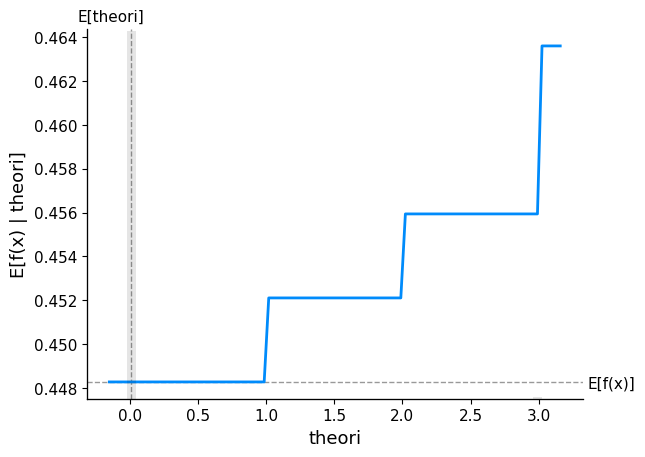

In [18]:
feature = "theori"

shap.partial_dependence_plot(
    feature, model.predict, X, ice=False,
    model_expected_value=True, feature_expected_value=True
)

## Compute SHAP Values

In [19]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X, max_evals=2*X.shape[1]+1)

Permutation explainer: 262it [11:29,  2.66s/it]                                      


## SHAP Values from Partial Dependence Plots

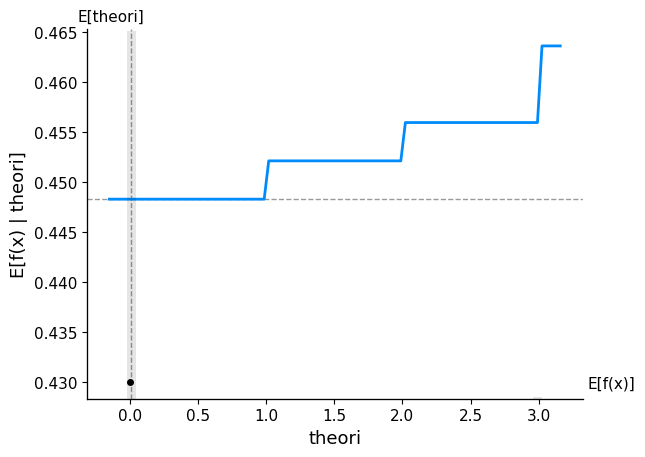

In [20]:
# make a standard partial dependence plot

feature = "theori"
sample_ind = 100

shap.partial_dependence_plot(
    feature, model.predict, X, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

## SHAP Values from Scatter Plots

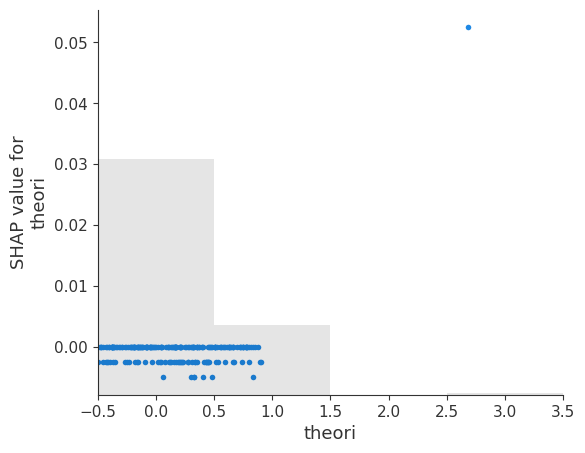

In [21]:
feature = "theori"
shap.plots.scatter(shap_values[:,feature])

## Waterfall Plot

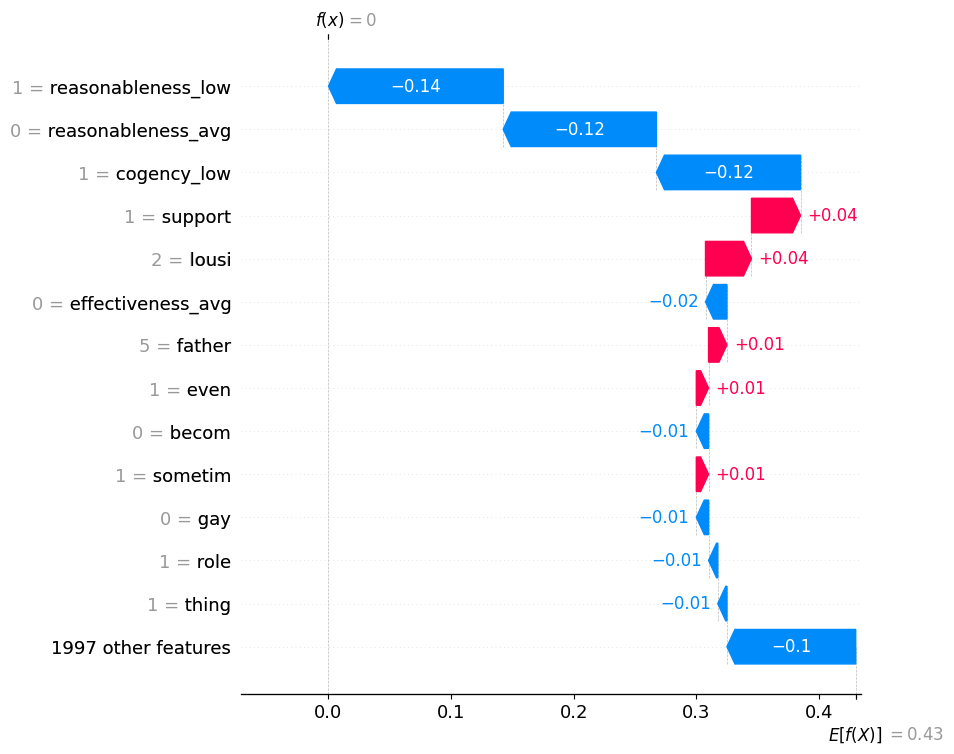

In [23]:
sample_ind = 100

shap.plots.waterfall(shap_values[sample_ind], max_display=14)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


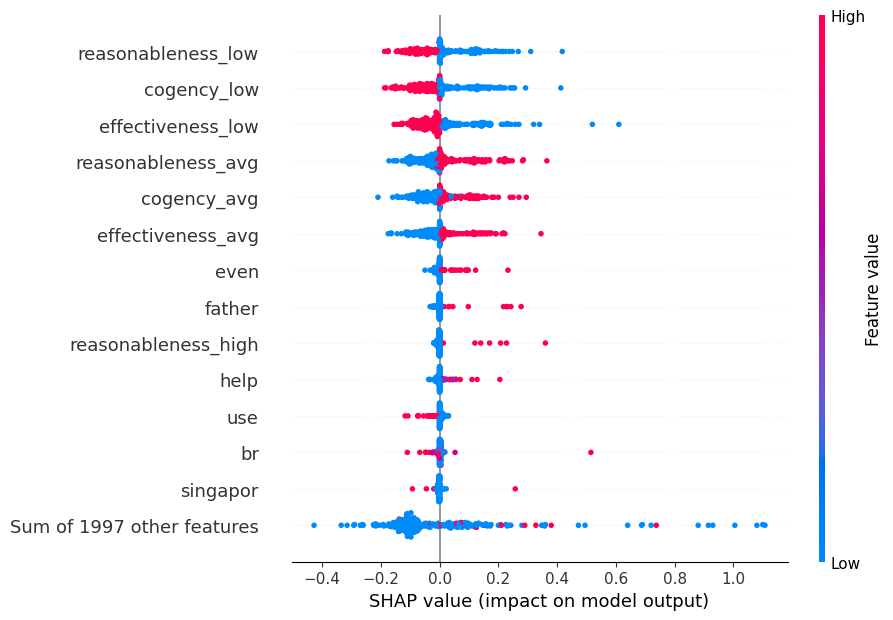

In [24]:
shap.plots.beeswarm(shap_values, max_display=14)

## Summarize the effect of all the features

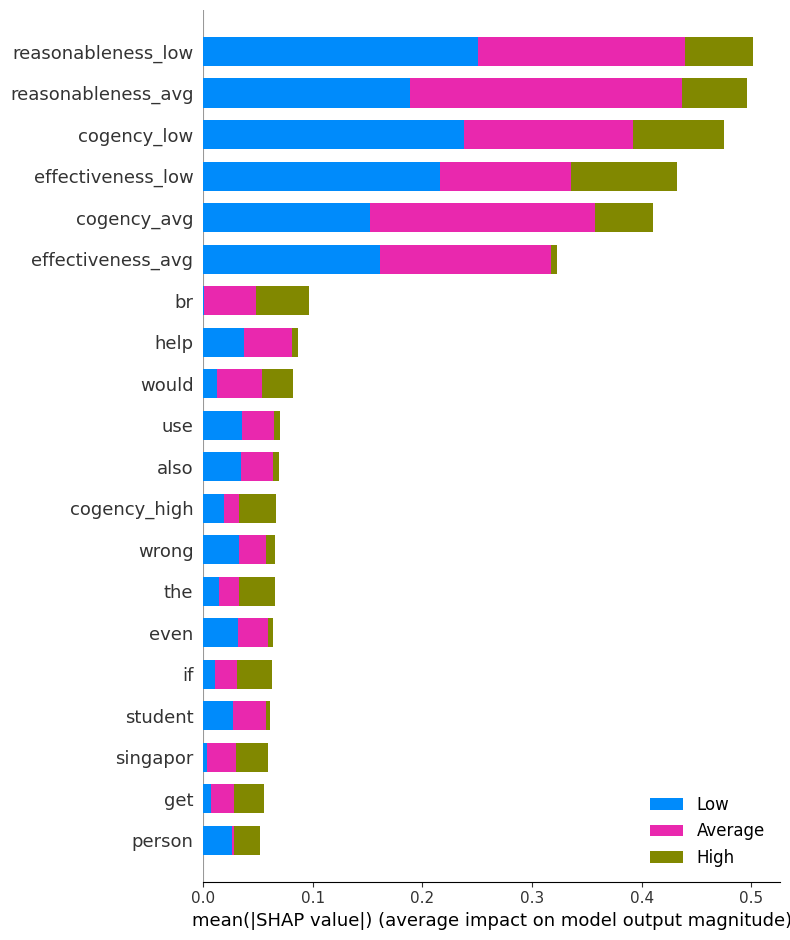

In [25]:
explainer = shap.Explainer(model, X_train, feature_names=X.columns)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X, feature_names=X.columns, 
                  class_names=["Low", "Average", "High"])